In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

In [10]:
train = pd.read_csv("train.csv")
train_X, train_Y = train['clean_text'], train['category']

test = pd.read_csv("test.csv")
test_X, test_Y = test['clean_text'], test['category']

val = pd.read_csv("validation.csv")
val_X, val_Y = val['clean_text'], val['category']

In [11]:
# Defining some wrapper functions

def fit_model(model):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2000)),
        ('clf', model),
    ])

    pipeline.fit(train_X, train_Y)
    return pipeline

def improve_model(model, param_grid):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2000)),
        ('gscv', GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5))),
    ])

    pipeline.fit(val_X, val_Y)
    return pipeline

def conf_matrix_display(model):
    
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2000)),
        ('clf', model),
    ])
    
    pipeline.fit(train_X, train_Y)
    y_pred = pipeline.predict(test_X)
    print(classification_report(test_Y, y_pred))
    
    # Generate confusion matrix
    cm = confusion_matrix(test_Y, y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

## Decision Tree Classifier

In [12]:
model1 = DecisionTreeClassifier(random_state=42)
pipeline1 = fit_model(model1)

print("The train score is {score}".format(score=pipeline1.score(train_X, train_Y)))
print("The validation score is {score}".format(score=pipeline1.score(val_X, val_Y)))
print("The test score is {score}".format(score=pipeline1.score(test_X, test_Y)))

The train score is 0.9994402462916316
The validation score is 0.9398692810457516
The test score is 0.9595827900912647


In [13]:
# Define the parameter grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10, 20],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

In [14]:
# Fine tuning the model
gscv1 = improve_model(model1, dt_param_grid).named_steps['gscv']

In [15]:
best_dt = gscv1.best_estimator_
best_pipeline = fit_model(best_dt)
print("The train score is {score}".format(score=best_pipeline.score(train_X, train_Y)))
print("The validation score is {score}".format(score=best_pipeline.score(val_X, val_Y)))
print("The test score is {score}".format(score=best_pipeline.score(test_X, test_Y)))

The train score is 0.9535404422054297
The validation score is 0.934640522875817
The test score is 0.9439374185136897


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       669
           1       0.82      0.71      0.77        98

    accuracy                           0.94       767
   macro avg       0.89      0.85      0.87       767
weighted avg       0.94      0.94      0.94       767



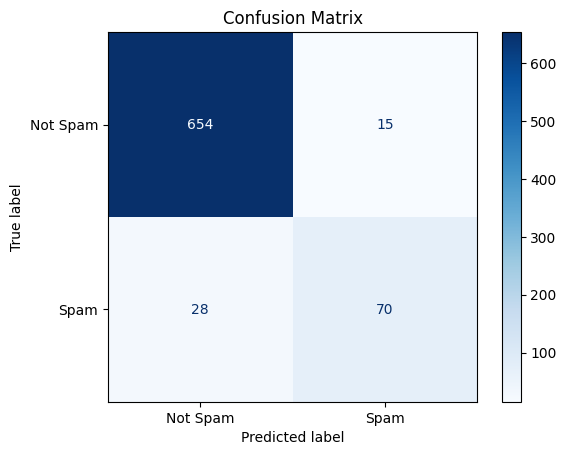

In [16]:
conf_matrix_display(best_dt)

## Model 2: LogisticRegression

In [17]:
model2 = LogisticRegression(random_state=42)
pipeline2 = fit_model(model2)

print("The train score is {score}".format(score=pipeline2.score(train_X, train_Y)))
print("The validation score is {score}".format(score=pipeline2.score(val_X, val_Y)))
print("The test score is {score}".format(score=pipeline2.score(test_X, test_Y)))

The train score is 0.9694934228939267
The validation score is 0.9633986928104575
The test score is 0.9569752281616688


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       669
           1       0.97      0.68      0.80        98

    accuracy                           0.96       767
   macro avg       0.96      0.84      0.89       767
weighted avg       0.96      0.96      0.95       767



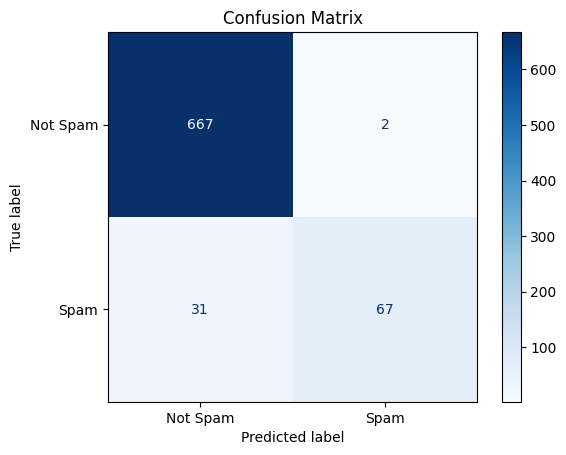

In [18]:
conf_matrix_display(model2)

## Model 3: RandomForestClassifier

In [21]:
model3 = RandomForestClassifier(random_state=42,n_estimators=200,min_samples_leaf=1,min_samples_split=2)
pipeline3 = fit_model(model3)

print("The train score is {score}".format(score=pipeline3.score(train_X, train_Y)))
print("The validation score is {score}".format(score=pipeline3.score(val_X, val_Y)))
print("The test score is {score}".format(score=pipeline3.score(test_X, test_Y)))

The train score is 0.9994402462916316
The validation score is 0.9660130718954248
The test score is 0.9752281616688396


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       669
           1       0.96      0.84      0.90        98

    accuracy                           0.98       767
   macro avg       0.97      0.92      0.94       767
weighted avg       0.98      0.98      0.97       767



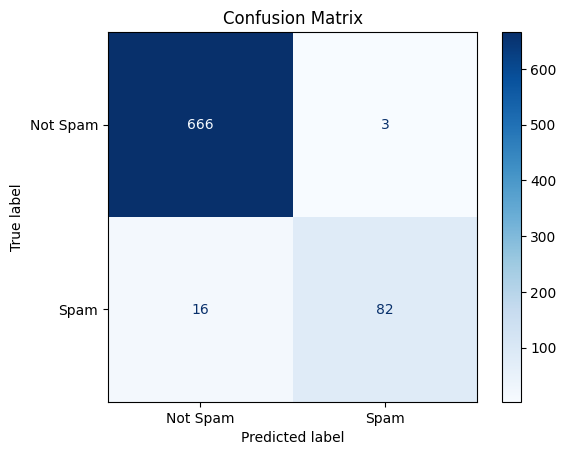

In [22]:
conf_matrix_display(model3)

## Conclusion

### We saw 3 different models; decision tree, logistic regression and a random forest. The best accuracies obtained (after fine tuning, if any) were 0.95, 0.96 and 0.98 respectively. So, the best model we obtained was a RandomForestClassfier with weighted average accuracy 0.98